In [18]:
# k-means 足球队聚类
from sklearn import cluster,preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 数据

In [4]:
data = pd.read_csv("./data/kmeans-master/data.csv",encoding="gbk")
data

,国家,2019年国际排名,2018世界杯,2015亚洲杯
0,中国,73,40,7
1,日本,60,15,5
2,韩国,61,19,2
3,伊朗,34,18,6
4,沙特,67,26,10
5,伊拉克,91,40,4
6,卡塔尔,101,40,13
7,阿联酋,81,40,6
8,乌兹别克斯坦,88,40,8
9,泰国,122,40,17


In [6]:
X  = data.iloc[:,1:]
X

,2019年国际排名,2018世界杯,2015亚洲杯
0,73,40,7
1,60,15,5
2,61,19,2
3,34,18,6
4,67,26,10
5,91,40,4
6,101,40,13
7,81,40,6
8,88,40,8
9,122,40,17


### 模型

In [7]:
kmeans =  cluster.KMeans(n_clusters=3)

In [8]:
# 数据规范化
mm = preprocessing.MinMaxScaler()

In [9]:
X_mm = mm.fit_transform(X)

In [10]:
kmeans.fit(X_mm)
y_pred = kmeans.predict(X_mm)
y_pred

array([2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [15]:
pd.merge(data,pd.DataFrame(y_pred,columns=['聚类结果']),left_index=True,right_index=True)

,国家,2019年国际排名,2018世界杯,2015亚洲杯,聚类结果
0,中国,73,40,7,2
1,日本,60,15,5,1
2,韩国,61,19,2,1
3,伊朗,34,18,6,1
4,沙特,67,26,10,1
5,伊拉克,91,40,4,2
6,卡塔尔,101,40,13,0
7,阿联酋,81,40,6,2
8,乌兹别克斯坦,88,40,8,2
9,泰国,122,40,17,0


### 聚类效果--kmeans手肘法

In [17]:
# 手肘法，误差平方和--- https://www.omegaxyz.com/2018/09/03/k-means-find-k/
kmeans.inertia_

1.34885191431165

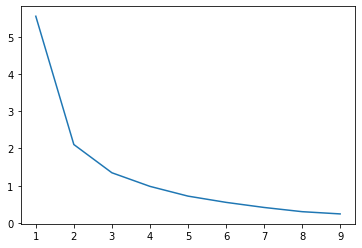

In [19]:
SSE =[]
for i in range(1,10,1):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_mm)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,10),SSE,)

### 聚类效果--kmeans轮廓系数

In [20]:
from sklearn  import metrics

In [21]:
kmeans.labels_

array([1, 2, 2, 2, 7, 1, 6, 1, 1, 6, 3, 4, 4, 3, 0, 5, 8, 4, 0, 3],
      dtype=int32)

In [22]:
metrics.silhouette_score(X_mm,kmeans.labels_,metric='euclidean')

0.38525914419708635

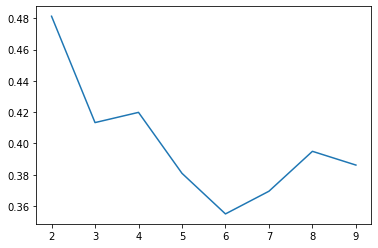

In [26]:
Scores=[]
for i in range(2,10,1):
    kmeans1 = cluster.KMeans(n_clusters=i)
    kmeans1.fit(X_mm)
    Scores.append(metrics.silhouette_score(X_mm,kmeans1.labels_,metric='euclidean'))
plt.plot(range(2,10),Scores,)